In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# notebook嵌入图片
%matplotlib inline
# 提高分辨率
%config InlineBackend.figure_format='retina'
from matplotlib.font_manager import FontProperties
font = FontProperties(fname="/root/miniconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf")
import warnings
warnings.filterwarnings('ignore')

In [2]:
#读取数据
data1 = pd.read_csv("data/data1.csv", encoding="gbk")
data2 = pd.read_csv("data/data2.csv", encoding="gbk")
data3 = pd.read_csv("data/data3.csv", encoding="gbk")

### 查看数据格式

In [3]:
data1.info

<bound method DataFrame.info of       Index  CardNo Sex    Major  AccessCardNo
0         1  180001   男   18国际金融      19762330
1         2  180002   男   18国际金融      20521594
2         3  180003   男   18国际金融      20513946
3         4  180004   男   18国际金融      20018058
4         5  180005   男   18国际金融      20945770
...     ...     ...  ..      ...           ...
4336   4337  184337   女   18工业工程      19051328
4337   4338  184338   女   18工业工程      21915376
4338   4339  184339   女   18工业工程      11513762
4339   4340  164340   男     18审计      12750370
4340   4341  164341   男  18宝玉石鉴定        427586

[4341 rows x 5 columns]>

In [4]:
data2.head()

,Index,CardNo,PeoNo,Date,Money,FundMoney,Surplus,CardCount,Type,TermNo,TermSerNo,conOperNo,OperNo,Dept
0,117342773,181316,20181316,2019/4/20 20:17,3.0,0.0,186.1,818,消费,49,NaN,NaN,235,第一食堂
1,117344766,181316,20181316,2019/4/20 8:47,0.5,0.0,199.5,814,消费,63,NaN,NaN,27,第二食堂
2,117346258,181316,20181316,2019/4/22 7:27,0.5,0.0,183.1,820,消费,63,NaN,NaN,27,第二食堂
3,117308066,181317,20181317,2019/4/21 7:46,3.5,0.0,50.2,211,消费,196,NaN,NaN,133,好利来食品店
4,117309001,181317,20181317,2019/4/19 22:31,2.5,0.0,61.7,209,消费,146,NaN,NaN,48,好利来食品店


In [5]:
data3.info

<bound method DataFrame.info of          Index  AccessCardNo             Date    Address  Access Describe
0      1330906      25558880    2019/4/1 0:00  第六教学楼[进门]       1     允许通过
1      1330907      18413143    2019/4/1 0:02  第六教学楼[出门]       1     允许通过
2      1331384      11642752    2019/4/1 0:00    飞凤轩[进门]       1     允许通过
3      1330908      24124155    2019/4/1 0:00  第六教学楼[出门]       1     允许通过
4      1331385      18629328    2019/4/1 0:11    飞凤轩[进门]       1     允许通过
...        ...           ...              ...        ...     ...      ...
43151  1376631      18842663  2019/4/28 23:54    青鸾苑[进门]       1     允许通过
43152  1372431      20105445  2019/4/28 23:55  第六教学楼[出门]       1     允许通过
43153  1374888        541579  2019/4/28 23:55    飞凤轩[进门]       1     允许通过
43154  1372432      24961634  2019/4/28 23:57  第六教学楼[进门]       1     允许通过
43155  1376632      18614986  2019/4/28 23:59    青鸾苑[进门]       1     允许通过

[43156 rows x 6 columns]>

### 数据预处理


data1

In [6]:
data1.shape

(4341, 5)

In [7]:
# 缺失值占比
data1.apply(lambda x : sum(x.isnull())/len(x), axis=0)

Index           0.0
CardNo          0.0
Sex             0.0
Major           0.0
AccessCardNo    0.0
dtype: float64

In [8]:
data1.to_csv('data/task1_1_1.csv', index=False, encoding='gbk')

data2

In [9]:
data2.shape

(519367, 14)

In [10]:
print(data2.isnull().sum())

Index             0
CardNo            0
PeoNo             0
Date              0
Money             0
FundMoney         0
Surplus           0
CardCount         0
Type              0
TermNo            0
TermSerNo    512106
conOperNo    519116
OperNo            0
Dept              0
dtype: int64


查看TermNo和TermSerNo缺失值占比？

In [11]:
# 缺失值占比 消费
sum(data2.conOperNo.isnull())/len(data2.conOperNo)

0.999516719391105

In [12]:
# 消费操作编码
sum(data2.TermSerNo.isnull())/len(data2.TermSerNo)

0.9860195199155896

几乎都全部确实，除去这两个属性

In [13]:
new_data2 = data2.drop(columns=['conOperNo', 'TermSerNo'])

查看消费地点分布

In [14]:
data2['Dept'].value_counts(dropna=False)

Dept
第二食堂      154873
第五食堂      117615
第一食堂       62090
第四食堂       60841
第三食堂       52103
好利来食品店     31781
财务处        18295
红太阳超市      12942
水电缴费处       3388
教师食堂        2145
医务室          794
第二图书馆        376
第一图书馆        291
工商系部         197
自然科学书库       195
财务部          170
第七教学楼        165
基础课部         133
艺术设计学院       131
第六教学楼        130
人文社科         109
第二教学楼         99
第五教学楼         99
飞凤轩宿管办        86
机电系           78
第四教学楼         56
第三教学楼         52
宿管办           47
青鸾苑宿管办        25
财经系           23
第一教学楼         23
外语系           12
旅游系            3
Name: count, dtype: int64

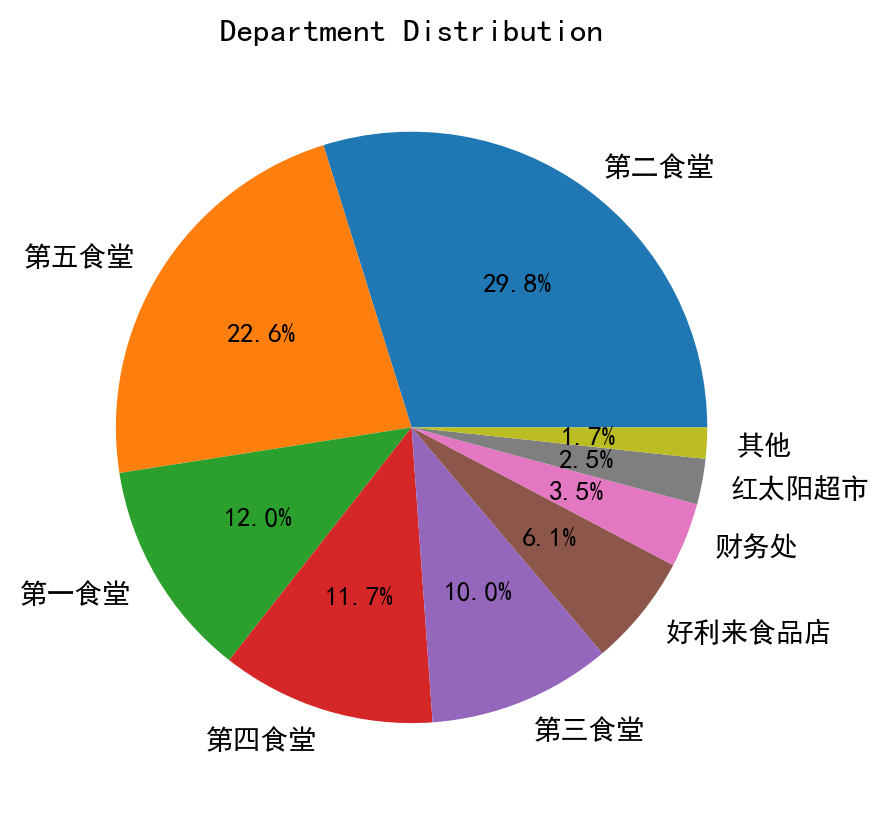

In [15]:
# new_data2['Dept'].value_counts().plot(kind='pie')
value_counts = new_data2['Dept'].value_counts()  
top_counts = value_counts.nlargest(8)  
other_counts = value_counts[value_counts.index.isin(top_counts.index) == False].sum()  
top_counts['其他'] = other_counts  

top_counts.plot(kind='pie', autopct='%1.1f%%')  
plt.title('Department Distribution')  
plt.ylabel('')  
plt.show()

In [16]:
new_data2[['Money','FundMoney','Surplus','CardCount']].describe().T[['mean', '50%', 'min', 'max']]

,mean,50%,min,max
Money,4.087279,3.0,0.0,900.00
FundMoney,3.949758,0.0,0.0,9800.00
Surplus,78.495517,64.5,0.0,9903.61
CardCount,1016.565421,749.0,1.0,14575.00


In [17]:
import time
# 消费时间数据进行时间格式转换并拆分为date和time
new_data2['Time'] = new_data2['Date'].apply(lambda date: time.strftime(
    '%H:%M', (time.strptime(date, '%Y/%m/%d %H:%M'))))
new_data2['Date'] = new_data2['Date'].apply(lambda date: date.split(' ')[0])

In [18]:
print(new_data2[['Time', 'Date']].head())  

    Time       Date
0  20:17  2019/4/20
1  08:47  2019/4/20
2  07:27  2019/4/22
3  07:46  2019/4/21
4  22:31  2019/4/19


In [19]:
# 删除无用属性
del new_data2['Index']
del new_data2['PeoNo']

In [20]:
new_data2.to_csv('data/task1_1_2.csv', index=False, encoding='gbk')

data3

In [21]:
# data3数据处理
data3.head(3)

,Index,AccessCardNo,Date,Address,Access,Describe
0,1330906,25558880,2019/4/1 0:00,第六教学楼[进门],1,允许通过
1,1330907,18413143,2019/4/1 0:02,第六教学楼[出门],1,允许通过
2,1331384,11642752,2019/4/1 0:00,飞凤轩[进门],1,允许通过


In [22]:
data3.shape

(43156, 6)

In [23]:
data3.dtypes

Index            int64
AccessCardNo     int64
Date            object
Address         object
Access           int64
Describe        object
dtype: object

In [24]:
data3['Time'] = data3['Date'].apply(lambda date: time.strftime(
    '%H:%M', (time.strptime(date, '%Y/%m/%d %H:%M'))))
data3['Date'] = data3['Date'].apply(lambda date: date.split(' ')[0])

In [25]:
print(data3[['Time', 'Date']].head())  

    Time      Date
0  00:00  2019/4/1
1  00:02  2019/4/1
2  00:00  2019/4/1
3  00:00  2019/4/1
4  00:11  2019/4/1


In [26]:
# 检查异常值
data3.apply(lambda x : sum(x.isnull())/len(x), axis=0)

Index           0.0
AccessCardNo    0.0
Date            0.0
Address         0.0
Access          0.0
Describe        0.0
Time            0.0
dtype: float64

In [27]:
data3['Address'].value_counts(dropna=False)

Address
飞凤轩[进门]      10689
飞凤轩[出门]      10397
第六教学楼[进门]     7713
第六教学楼[出门]     7217
青鸾苑[出门]       3318
青鸾苑[进门]       2787
第七教学楼[进门]      449
第五教学楼[进门]      250
第五教学楼[出门]      222
第七教学楼[出门]      114
Name: count, dtype: int64

In [28]:
data3['Access'].value_counts(dropna=False)

Access
1    41749
0     1407
Name: count, dtype: int64

In [29]:
data3 = data3[data3.loc[:,'Access'] != 0]
print('删除异常值之后：',data3.shape)

删除异常值之后： (41749, 7)


In [30]:
data3.to_csv('data/task1_1_3.csv', index=False, encoding='gbk')